In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [41]:
import numpy as np
import pandas as pd
import datetime as dt

from pandas.plotting import table

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
DBase = automap_base()

# reflect the tables
DBase.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
DBase.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = DBase.classes.measurement
Station = DBase.classes.station


In [11]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.

recent_date = session.query(func.max(Measurement.date)).first()[0]
recent_date

'2017-08-23'

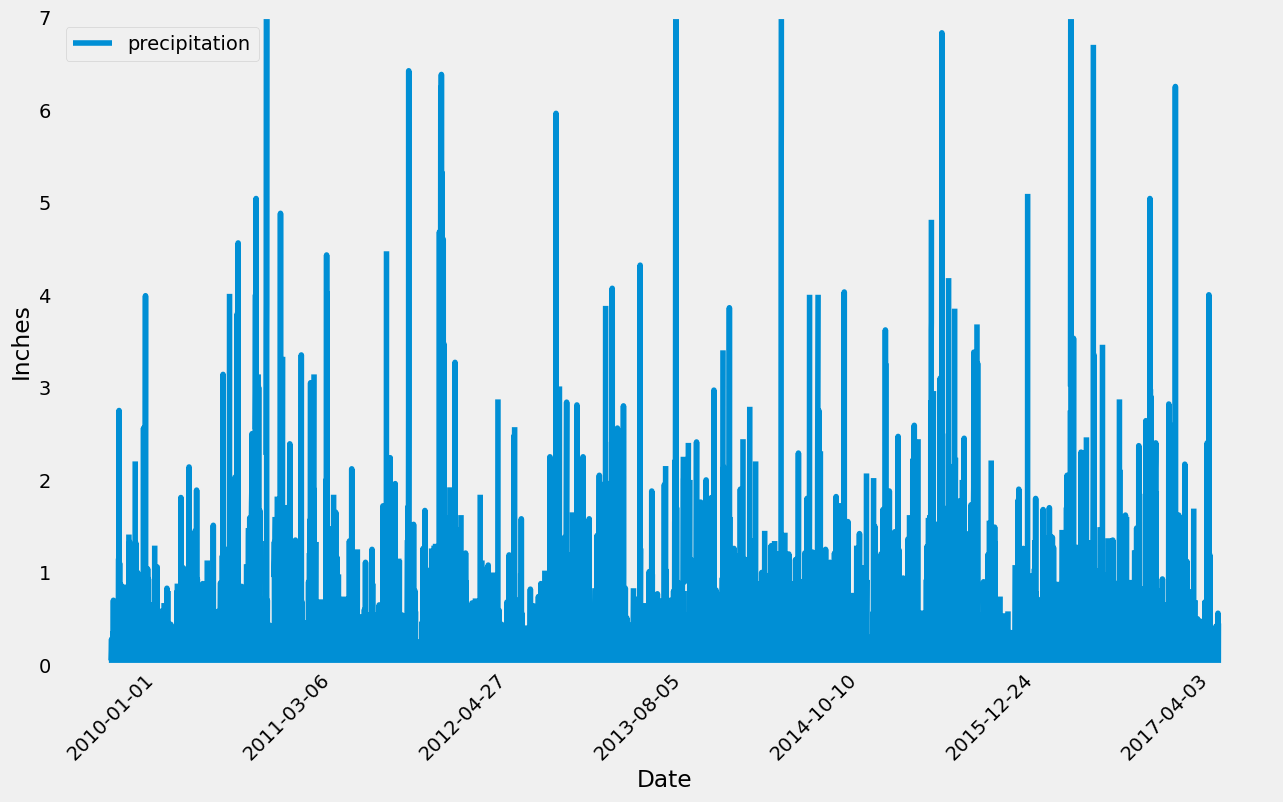

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
#latest_date = (dt.datetime.strptime(latest_date[0], '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
#one_year_ago = latest_date - dt.timedelta(days=365)

prev_year = dt.date(2017,8,23)- dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores


precip_score = session.query(Measurement.date, Measurement.prcp).\
    group_by ("date", "prcp").all()
    
    
#print(precip_score)

# Save the query results as a Pandas DataFrame and set the index to the date column
rain_df= pd.DataFrame(precip_score, columns = ['date', 'precipitation'])

# Sort the dataframe by date

rain_df.set_index(rain_df['date'], inplace = True)





# Use Pandas Plotting with Matplotlib to plot the data


plot = rain_df.plot(figsize=(14,8), ylim=(0,7), rot=45)
plot.set_ylabel("Inches")
plot.set_xlabel("Date")
plot.grid()
plt.show()



In [34]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_df.describe()

,precipitation
count,11446.000000
mean,0.249809
std,0.569374
min,0.000000
25%,0.010000
50%,0.060000
75%,0.230000
max,11.530000


# Exploratory Station Analysis

In [36]:
# Design a query to calculate the total number stations in the dataset
station_number = session.query(func.count(Station.name)).all()

In [38]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order. refernce class 3 code on chinook

session.query(Measurement.station, func.count(Measurement.id)).\
group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [40]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_stats=session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
print(station_stats)

[(54.0, 85.0, 71.66378066378067)]


In [46]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [Measurement.date, 
       Measurement.tobs]
station_TOBS = session.query(*sel).\
        filter(func.strftime(Measurement.date) >= prev_year, Measurement.station == 'USC00519281').\
        group_by(Measurement.date).\
        order_by(Measurement.date).all()

#must make variable in df to feed into plt.hist function to plot graph below 

temps = pd.DataFrame(station_TOBS, columns=['Measurement_Date', 'Temperature'])

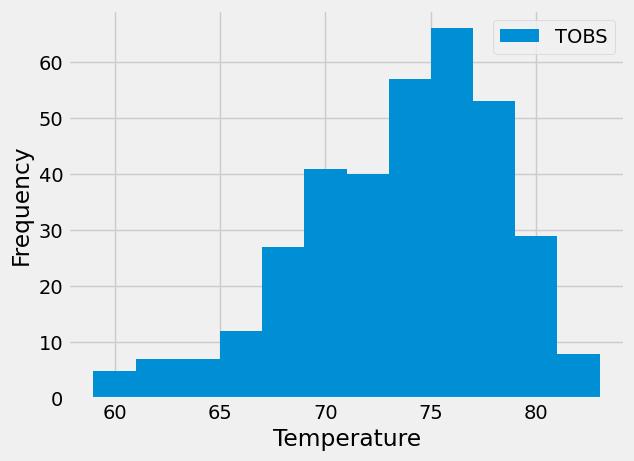

In [47]:
#making histogram use https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/

plt.hist(temps['Temperature'],bins=12, density=False, label="TOBS")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()
plt.figsize=(10,7)
plt.show()

# Close session

In [48]:
# Close Session
session.close()